In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

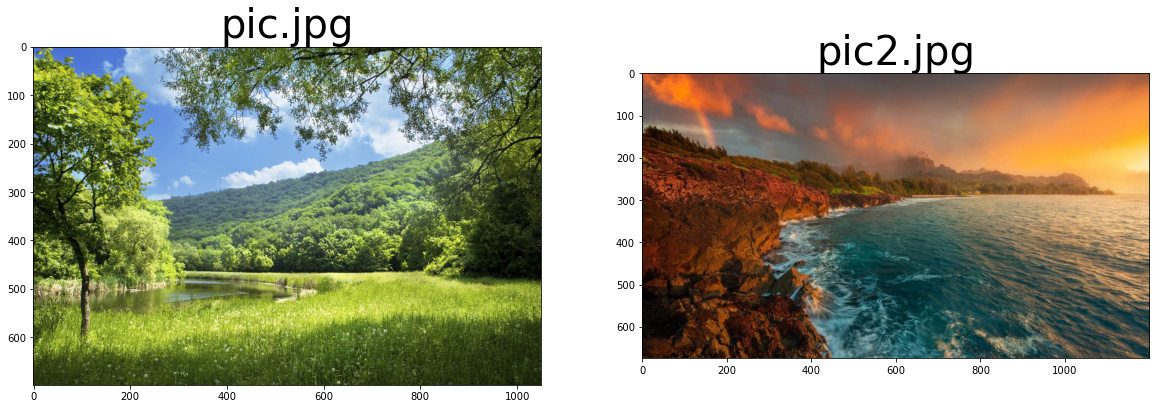

(699, 1049, 3) (675, 1200, 3)


In [3]:
pic = cv2.imread('pic.jpg')
pic2 = cv2.imread('pic2.jpg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
pic2 = cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1, 2, figsize=(20,40))
axs[0].imshow(pic)
axs[0].set_title('pic.jpg', fontsize=40)
axs[1].imshow(pic2)
axs[1].set_title('pic2.jpg', fontsize=40)
# plt.imshow(pic)
plt.show()
print(pic.shape, pic2.shape)


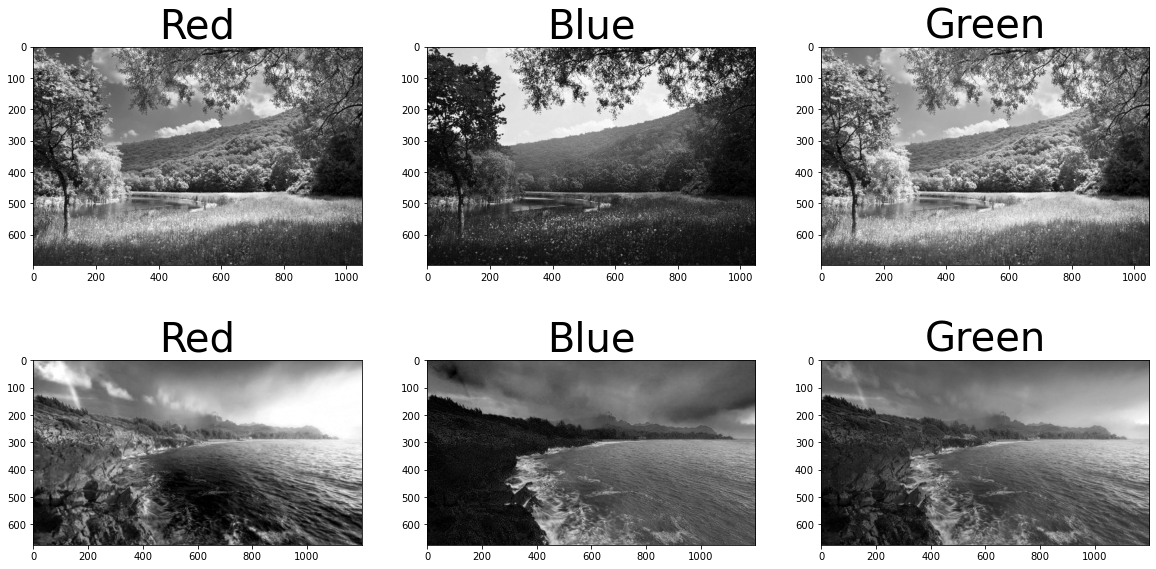

In [4]:
red_channel = pic[:, :, 0]
green_channel = pic[:, :, 1]
blue_channel = pic[:, :, 2]

red_channel_2 = pic2[:, :, 0]
green_channel_2 = pic2[:, :, 1]
blue_channel_2 = pic2[:, :, 2]

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs[0][0].imshow(red_channel, cmap='gray')
axs[0][0].set_title('Red', fontsize=40)
axs[0][1].imshow(blue_channel, cmap='gray')
axs[0][1].set_title('Blue', fontsize=40)
axs[0][2].imshow(green_channel, cmap='gray')
axs[0][2].set_title('Green', fontsize=40)
axs[1][0].imshow(red_channel_2, cmap='gray')
axs[1][0].set_title('Red', fontsize=40)
axs[1][1].imshow(blue_channel_2, cmap='gray')
axs[1][1].set_title('Blue', fontsize=40)
axs[1][2].imshow(green_channel_2, cmap='gray')
axs[1][2].set_title('Green', fontsize=40)
plt.show()

[  0 255]


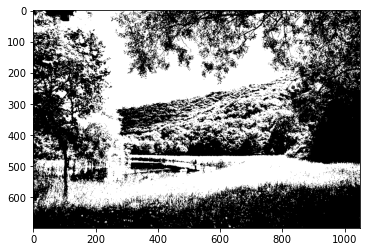

In [28]:
red_avg = pic[:, :, 0].mean()
green_avg = pic[:, :, 1].mean()
blue_avg = pic[:, :, 2].mean()

pic_gray = cv2.cvtColor(pic, cv2.COLOR_RGB2GRAY)
# print(np.unique(pic_gray))
gray_avg = pic_gray.mean()
w, h = pic_gray.shape[0],  pic_gray.shape[1]
pic_gray_flat = pic_gray.flat

for i in range(len(pic_gray_flat)):
    if pic_gray_flat[i] <= gray_avg:
        pic_gray_flat[i] = 0
    else:
        pic_gray_flat[i] = 255
        
pic_gray_reconstructed = np.array(pic_gray_flat).reshape(w,h)
plt.imshow(pic_gray_reconstructed, cmap='gray')
print(np.unique(pic_gray_reconstructed))

[  0.    63.75 191.25 255.  ]
[  0.   127.5  191.25 255.  ]


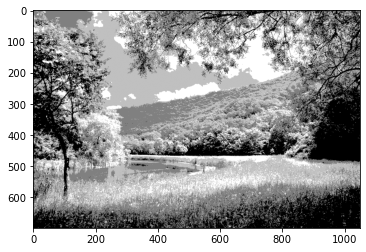

In [33]:
pic_gray = cv2.cvtColor(pic, cv2.COLOR_RGB2GRAY)
np.unique(pic_gray / 255)
pic_gray_0_1 = pic_gray / 255
pic_gray_flat = pic_gray_0_1.flat
gray_avg = pic_gray_0_1.mean()

for i in range(len(pic_gray_flat)):
    if pic_gray_flat[i] >= 0.75:
        pic_gray_flat[i] = 1
    elif pic_gray_flat[i] >= 0.5:
        pic_gray_flat[i] = 0.75
    elif pic_gray_flat[i] >= 0.25:
        pic_gray_flat[i] = 0.5
    else: 
        pic_gray_flat[i] = 0
print(np.unique(pic_gray_reconstructed))
pic_gray_reconstructed = np.array(np.array(pic_gray_flat) * 255).reshape(w,h)
plt.imshow(pic_gray_reconstructed, cmap='gray')
print(np.unique(pic_gray_reconstructed))
